In [28]:
import ikpy
from ikpy.chain import Chain
from ikpy.link import OriginLink ,URDFLink
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [46]:
urdf_file ='/home/mark/panda_ws/src/robot_description/urdf/robot_arm.urdf.xacro'
my_chain = Chain.from_urdf_file(urdf_file,active_links_mask=[False,True,True,True,True,True,True,False])

/home/mark/.local/lib/python3.10/site-packages/ikpy/chain.py:60: UserWarning: Link base_link_to_link1 (index: 1) is of type 'fixed' but set as active in the active_links_mask. In practice, this fixed link doesn't provide any transformation so is as it were inactive
  warnings.warn("Link {} (index: {}) is of type 'fixed' but set as active in the active_links_mask. In practice, this fixed link doesn't provide any transformation so is as it were inactive".format(link.name, link_index))


In [20]:
for i, link in enumerate(my_chain.links):
    print(i, link.name, link.joint_type)

0 Base link fixed
1 base_link_to_link1 fixed
2 link1_to_link2 revolute
3 link2_to_link3 revolute
4 link3_to_link4 revolute
5 link4_to_link5 revolute
6 link5_to_link6 revolute
7 link6_to_flange_link revolute


In [ ]:
frame = np.array([
    [2 ,3,3,3],
    [1,2,4,5],
    [6,7,8,9],
    [1,2,3,4]
])

In [47]:
see=my_chain.inverse_kinematics([-0.5,0.3,0])
print(see)

[ 0.00000000e+00  0.00000000e+00  1.32330816e+00 -1.80051059e+00
  1.31638372e-05  4.85213229e-01 -5.61863373e-01  0.00000000e+00]


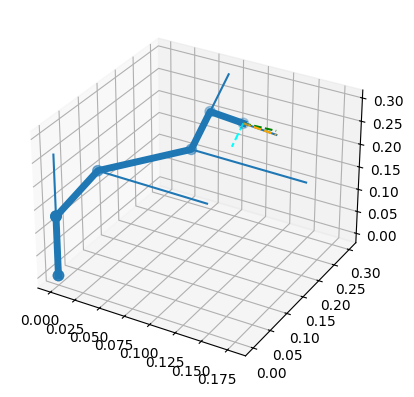

In [39]:
ax = plt.figure().add_subplot(111, projection='3d')

my_chain.plot(my_chain.inverse_kinematics([3,6,2]),ax)
plt.show()

In [44]:
for i, degree in enumerate(see):
    print(i, np.rad2deg(degree))

0 0.0
1 0.0
2 -25.28990609632794
3 -54.9312571513066
4 -0.0157974375053991
5 27.867998298368743
6 -31.98913151570602
7 0.0


In [55]:
positions =[
                1.3233,-1.8005,1.3168, 4.85213, -5.61860,0.0
            ]
positions_false=[0,0,0,0,0,0]
for  value in range(len(positions)):
    positions_false.insert(value,positions[value])
    f_positions = positions_false
    print(f_positions[:6])

[1.3233, 0, 0, 0, 0, 0]
[1.3233, -1.8005, 0, 0, 0, 0]
[1.3233, -1.8005, 1.3168, 0, 0, 0]
[1.3233, -1.8005, 1.3168, 4.85213, 0, 0]
[1.3233, -1.8005, 1.3168, 4.85213, -5.6186, 0]
[1.3233, -1.8005, 1.3168, 4.85213, -5.6186, 0.0]
